# Computação IV EP1
## Detectando e Interpretando Sinais Periódicos em Séries Temporais Paleobiológicas
- `Aluno 1`: Helena Baptista Reis
- `NUSP`: 14577622

- `Aluno 2`: Luca Marinho Nasser Valadares Paiva
- `NUSP`: 13691375

## Sugestões: 
- utilize markdown para deixar seu Notebook organizado (utilize h1, h2, ..., faça um índice, etc)
- explique seu código / raciocínio ao longo do Notebook
- utilize um ambiente virtual
- adicione suas dependências ao `requirements.txt`
- adicione explicações/instruções sobre outros arquivos/códigos autorais no README.md
- aprenda a utilizar paths de maneira eficiente (veja exemplo abaixo quando importamos os dados)

In [66]:
# Dependências
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths
GENERA_DATA_PATH = Path("data/raw/genera_data.csv")

## Índice
- Etapa 1 - Exploração Inicial
- Etapa 2 - Remoção da Tendência
- Etapa 3 - Análise Espectral
- Etapa 4 - Construção de Modelos Nulos
- Etapa 5 - Teste de Significância
- Etapa 6 - Discussão e Interpretação

## Etapa 1 - Exploração Inicial

textinho explicativo

In [67]:
df = pd.read_csv(GENERA_DATA_PATH)
df


,TimeBin,Diversity
0,0.0,4166.0
1,1.0,4166.0
2,2.0,4062.5
3,3.0,4062.5
4,4.0,3941.5
...,...,...
537,537.0,47.0
538,538.0,16.0
539,539.0,16.0
540,540.0,16.0


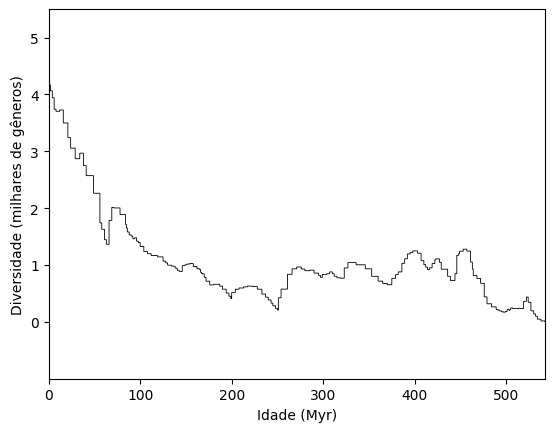

In [68]:
# make data
y = df["Diversity"] / 1000

# plot
fig, ax = plt.subplots()
ax.stairs(y, linewidth=0.6, color="black")
ax.set(xlim=(0, 542), xticks=np.arange(0, 542, 100),
       ylim=(-1, 5.5), yticks=np.arange(0, 6),
       xlabel="Idade (Myr)", ylabel="Diversidade (milhares de gêneros)")

plt.show()

verificar tendências de longo prazo, picos e vales

## Etapa 2 - Remoção de Tendências

textinho explicativo

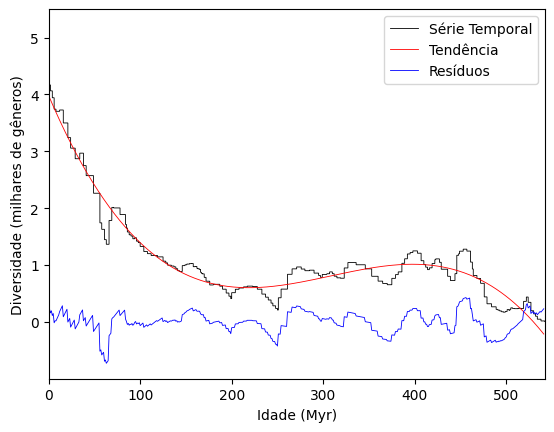

In [69]:
x = df["TimeBin"]
y = df["Diversity"] / 1000

coeficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coeficients)

# plot
fig, ax = plt.subplots()
ax.stairs(y, linewidth=0.6, color="black")
ax.set(xlim=(0, 542), xticks=np.arange(0, 542, 100),
       ylim=(-1, 5.5), yticks=np.arange(0, 6),
       xlabel="Idade (Myr)", ylabel="Diversidade (milhares de gêneros)")

ax.plot(x, polynomial(x), color="red", linewidth=0.6)
ax.plot(x, y - polynomial(x), color="blue", linewidth=0.6)
ax.legend(["Série Temporal", "Tendência", "Resíduos"], loc="upper right")
plt.show()

## Etapa 3 - Análise Espectral

explicar o pad (colocar antes sem o pad)

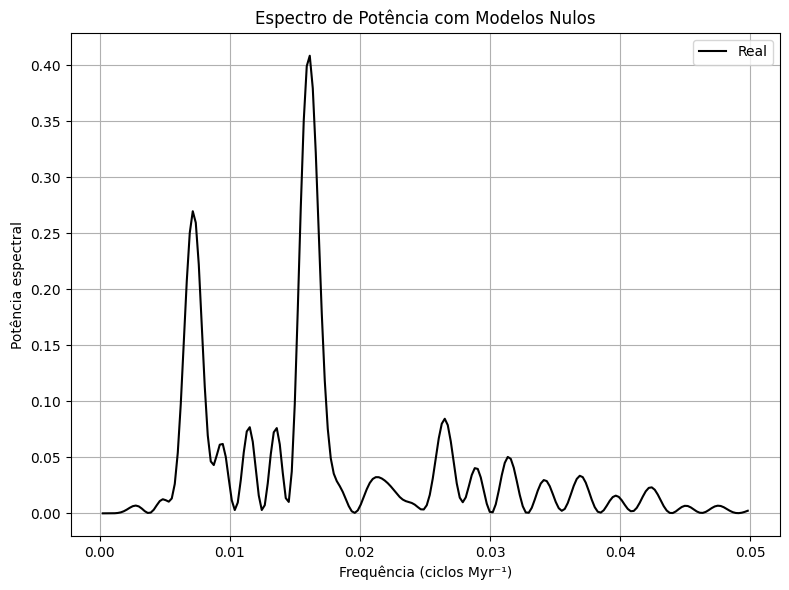

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def calcular_espectro(series, dt, pad=4):
    N = len(series)
    N_pad = pad * N  # zero-padding
    series_padded = np.pad(series, (0, N_pad - N), 'constant')
    freqs = fftfreq(N_pad, d=dt)
    fft_vals = fft(series_padded)
    potencia = (np.abs(fft_vals)**2) / N_pad
    mask = (freqs > 0) & (freqs < 0.05)
    return freqs[mask], potencia[mask]


residuos = y - polynomial(x)
# Série real sem tendência
freqs_real, pot_real = calcular_espectro(residuos, dt=1, pad=8)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(freqs_real, pot_real, label='Real', color='black')
plt.xlabel('Frequência (ciclos Myr⁻¹)')
plt.ylabel('Potência espectral')
plt.title('Espectro de Potência com Modelos Nulos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



como identificar os picos relevantes?

Frequências relevantes (picos únicos > 10% do máximo):
Período: 139.87 Myr - Frequência: 0.0071 ciclos/Myr - Potência: 0.2696
Período: 105.76 Myr - Frequência: 0.0095 ciclos/Myr - Potência: 0.0619
Período: 86.72 Myr - Frequência: 0.0115 ciclos/Myr - Potência: 0.0769
Período: 73.49 Myr - Frequência: 0.0136 ciclos/Myr - Potência: 0.0761
Período: 61.94 Myr - Frequência: 0.0161 ciclos/Myr - Potência: 0.4084
Período: 37.70 Myr - Frequência: 0.0265 ciclos/Myr - Potência: 0.0844
Período: 31.88 Myr - Frequência: 0.0314 ciclos/Myr - Potência: 0.0503


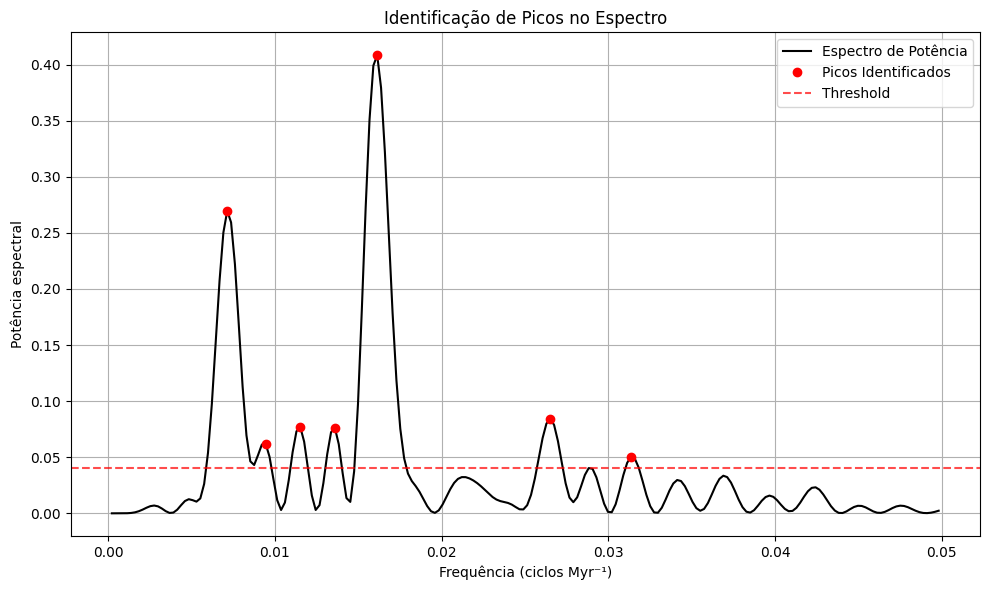

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Para identificar frequências relevantes, detectar picos únicos:
threshold = np.max(pot_real) * 0.1  # 10% do máximo
height = threshold  # altura mínima do pico
distance = len(freqs_real) // 50  # distância mínima entre picos (ajuste conforme necessário)

# Encontrar picos únicos
picos, properties = find_peaks(pot_real, height=height, distance=distance)

print("Frequências relevantes (picos únicos > 10% do máximo):")
for i in picos:
    periodo = 1/freqs_real[i]
    potencia = pot_real[i]
    print(f"Período: {periodo:.2f} Myr - Frequência: {freqs_real[i]:.4f} ciclos/Myr - Potência: {potencia:.4f}")

# Plot para visualizar os picos identificados
plt.figure(figsize=(10, 6))
plt.plot(freqs_real, pot_real, label='Espectro de Potência', color='black')
plt.plot(freqs_real[picos], pot_real[picos], 'ro', label='Picos Identificados')
plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, label='Threshold')
plt.xlabel('Frequência (ciclos Myr⁻¹)')
plt.ylabel('Potência espectral')
plt.title('Identificação de Picos no Espectro')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Frequências relevantes (picos únicos > 25% do máximo):
Período: 139.87 Myr - Frequência: 0.0071 ciclos/Myr - Potência: 0.2696
Período: 61.94 Myr - Frequência: 0.0161 ciclos/Myr - Potência: 0.4084


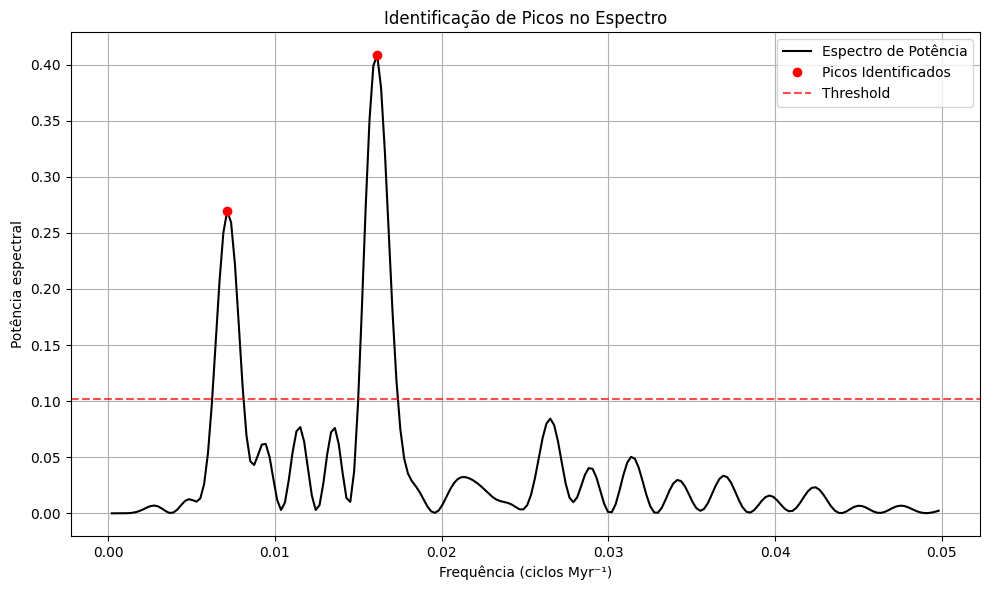

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Para identificar frequências relevantes, detectar picos únicos:
threshold = np.max(pot_real) * 0.25  # 10% do máximo
height = threshold  # altura mínima do pico
distance = len(freqs_real) // 50  # distância mínima entre picos (ajuste conforme necessário)

# Encontrar picos únicos
picos, properties = find_peaks(pot_real, height=height, distance=distance)

print("Frequências relevantes (picos únicos > 25% do máximo):")
for i in picos:
    periodo = 1/freqs_real[i]
    potencia = pot_real[i]
    print(f"Período: {periodo:.2f} Myr - Frequência: {freqs_real[i]:.4f} ciclos/Myr - Potência: {potencia:.4f}")

# Plot para visualizar os picos identificados
plt.figure(figsize=(10, 6))
plt.plot(freqs_real, pot_real, label='Espectro de Potência', color='black')
plt.plot(freqs_real[picos], pot_real[picos], 'ro', label='Picos Identificados')
plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, label='Threshold')
plt.xlabel('Frequência (ciclos Myr⁻¹)')
plt.ylabel('Potência espectral')
plt.title('Identificação de Picos no Espectro')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()